# DATA 620 Homework 3.2 - Mode Network

#### CUNY SPS - Data 620 - Web Analytics, Summer 2018

Professor: Alain Ledon

Members: Andrew Carson, Nathaniel Cooper, Eleanor Romero-Secoquian, Walt Wells

Introduction: Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the properties of those graphs.

These data were collected by Davis et al. in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The graph is bipartite (clubs, women).

davis_club script source: https://networkx.github.io/documentation/latest/auto_examples/algorithms/plot_davis_club.html

In this assignment we are given a dataset that shows a simple 2-node network: the attendance of 18 Southern Women at 14 social events. We are asked to analyze and determine the relationship between these 2-node network.

In [15]:
import davis_club as dc
import networkx as nx
import networkx.algorithms.bipartite as bi
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Test if the graph is connected.
nx.is_connected(G) 

True

In [7]:
# Test if the graph is bipartite.
bi.is_bipartite(G)

True

In [9]:
# Show the number of nodes and edges and the average degree.
print(nx.info(G))

Name: Davis Southern Club Women
Type: Graph
Number of nodes: 32
Number of edges: 93
Average degree:   5.8125


In [13]:
# Show the center, diameter, and radius.
center = nx.center(G)
diameter = nx.diameter(G)
radius = nx.radius(G)
print("Center:", center)
print("Diameter:", diameter)
print("Radius:", radius)

Center: ['EVELYN', 'E6', 'E8', 'E9', 'E7', 'THERESA', 'RUTH', 'VERNE', 'SYLVIA', 'NORA', 'HELEN']
Diameter: 4
Radius: 3


In [16]:
nodes = []
betweenness = [] 
for i, j in sorted(nx.betweenness_centrality(G).items(), key=lambda kv: (-kv[1], kv[0]))[0:11]: 
    nodes.append(i)
    betweenness.append(j)
d = {"Node":nodes, "Betweenness": betweenness}
data = pd.DataFrame(d)
print (data[["Node","Betweenness"]])

       Node  Betweenness
0        E8     0.232821
1        E9     0.206945
2        E7     0.124940
3      NORA     0.094490
4    EVELYN     0.091957
5   THERESA     0.083310
6     HELEN     0.066079
7        E6     0.060237
8    SYLVIA     0.054406
9     LAURA     0.049154
10   BRENDA     0.047337


Calculating betweenness mirrors the graph projection of highly connected nodes.

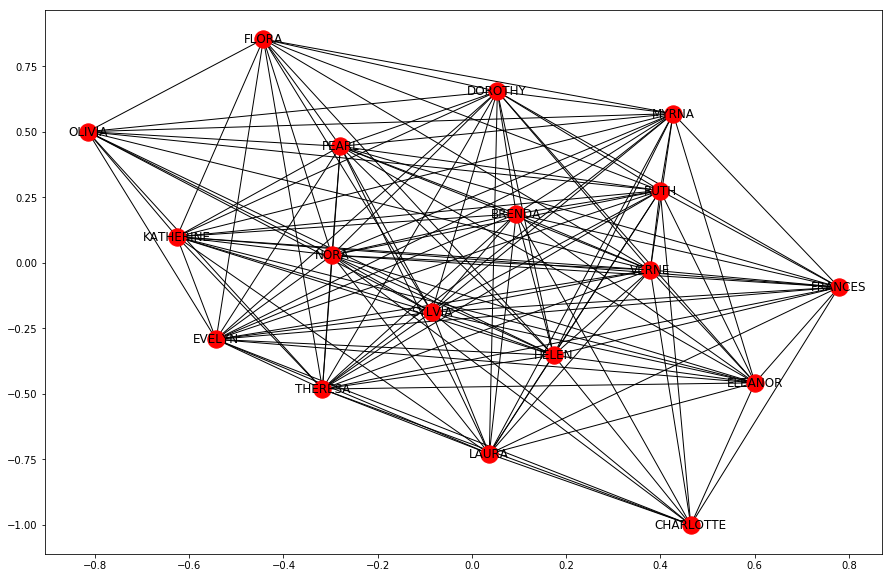

In [8]:
# Get bipartite data
(G, women, events) = dc.davis_club_graph()

# Project bipartite graph onto women node
w = dc.project(G, women) 

plt.figure(figsize=(15,10))
nx.draw_networkx(w)
plt.show()

As we can see, these women have a well-connected network. Closeness and degree centrality seems high.

In [17]:
print("Connections, Woman")
for i in women:
    print('%d %s' % (bi.projected_graph(G, women).degree(i),i))

Connections, Woman
17 EVELYN
15 LAURA
17 THERESA
15 BRENDA
11 CHARLOTTE
15 FRANCES
15 ELEANOR
16 PEARL
17 RUTH
17 VERNE
16 MYRNA
16 KATHERINE
17 SYLVIA
17 NORA
17 HELEN
16 DOROTHY
12 OLIVIA
12 FLORA


In [18]:
def topcentrality(G):
    toplist = sorted(G.items(), key=lambda kv: (-kv[1], kv[0]) ) 
    return toplist

In [19]:
topcentrality(nx.betweenness_centrality(bi.projected_graph(G, women)))

[('EVELYN', 0.010122230710466005),
 ('HELEN', 0.010122230710466005),
 ('NORA', 0.010122230710466005),
 ('RUTH', 0.010122230710466005),
 ('SYLVIA', 0.010122230710466005),
 ('THERESA', 0.010122230710466005),
 ('VERNE', 0.010122230710466005),
 ('DOROTHY', 0.0053475935828877),
 ('KATHERINE', 0.0053475935828877),
 ('MYRNA', 0.0053475935828877),
 ('PEARL', 0.0053475935828877),
 ('BRENDA', 0.0026737967914438505),
 ('ELEANOR', 0.0026737967914438505),
 ('FRANCES', 0.0026737967914438505),
 ('LAURA', 0.0026737967914438505),
 ('CHARLOTTE', 0.0),
 ('FLORA', 0.0),
 ('OLIVIA', 0.0)]

Seven women have greater betweennees centrality than the remaining women. 

**We can infer the connection strength and node similarity by weighting the edges based on common clubs.** 

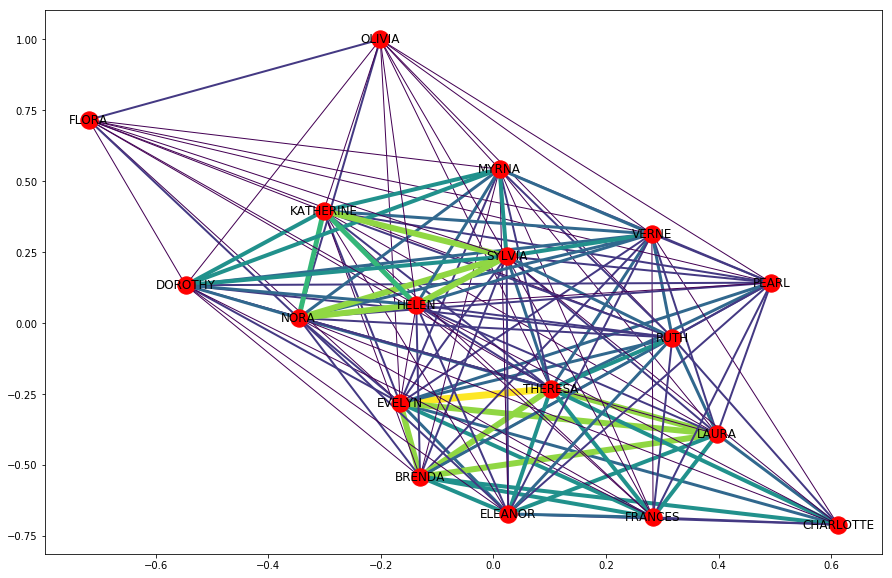

In [3]:
wnet = bi.weighted_projected_graph(G, w, ratio=False)
weights = [edata['weight'] for f,t,edata in wnet.edges(data=True)]
plt.figure(figsize = (15,10))
nx.draw_networkx(wnet, width=weights, edge_color=weights)

**It appears there are a couple of strong sub-networks between [Laura, Evelyn, Brenda, Theresa] and [Helen, Sylvia, Nora, Katherine].**    

**Let's now look at events using the same bipartite projection method.**

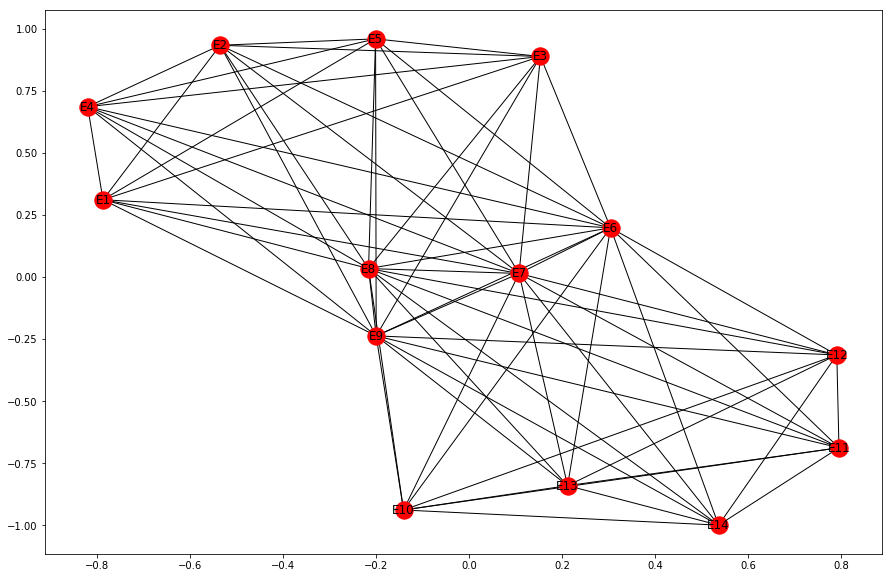

In [20]:
# Project bipartite graph onto events node
e = dc.project(G, events) 

plt.figure(figsize=(15,10))
nx.draw_networkx(e)
plt.show()

In [21]:
print("Event, Connections")
for i in events:
    print('%s %d' % (i, e.degree(i)))

Event, Connections
E1 10
E2 10
E3 10
E4 10
E5 10
E6 15
E7 15
E8 15
E9 15
E10 10
E11 10
E12 10
E13 10
E14 10


In [23]:
topcentrality(nx.betweenness_centrality(e))

[('E6', 0.08012820512820512),
 ('E7', 0.08012820512820512),
 ('E8', 0.08012820512820512),
 ('E9', 0.08012820512820512),
 ('E1', 0.0),
 ('E10', 0.0),
 ('E11', 0.0),
 ('E12', 0.0),
 ('E13', 0.0),
 ('E14', 0.0),
 ('E2', 0.0),
 ('E3', 0.0),
 ('E4', 0.0),
 ('E5', 0.0)]

Four events have greater betweennees centrality than the remaining events.

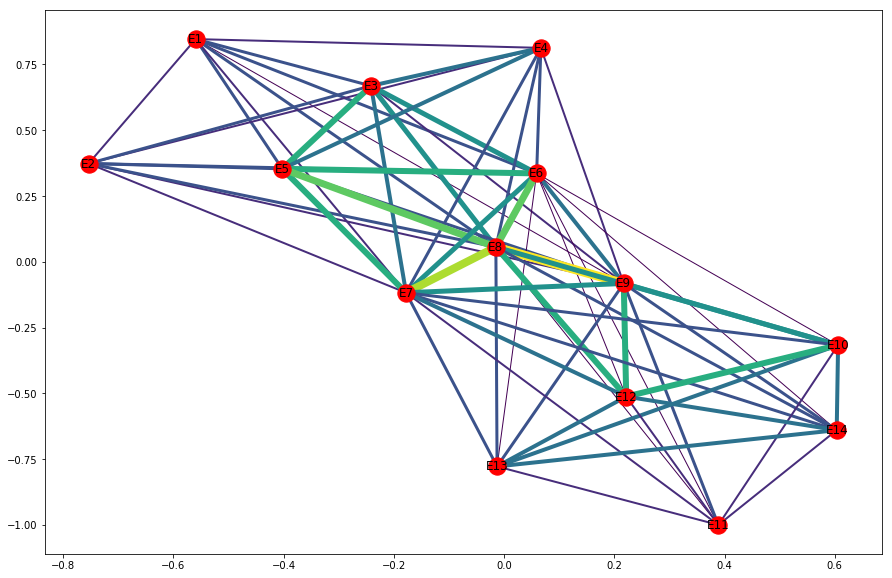

In [24]:
enet = bi.weighted_projected_graph(G, e)
enet.edges(data=True)
weights=[edata['weight'] for f,t,edata in enet.edges(data=True)]
plt.figure(figsize=(15,10))
nx.draw_networkx(enet, width=weights, edge_color=weights)

**In here, a few events (E7, E8, and E9) seem to have really large attendance.**

**Conclusion:**

**We can see that events and women members are closely connected and there were no unconnected nodes.**